# Self Organized Maps

### Deteccion de fraudes


In [1]:
# Importar las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importar el dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/joanby/deeplearning-az/master/datasets/Part%204%20-%20Self%20Organizing%20Maps%20(SOM)/Credit_Card_Applications.csv')
dataset.head(3)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


In [3]:
X = dataset.iloc[:, :-1].values
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [4]:
# La ulitma columna indica si elcliente recibio o no la tarjeta
y = dataset.iloc[:, -1].values
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [5]:
# Escalado de datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1) )
X = scaler.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [6]:
# Entrenar el SOM
#!pip install minisom

In [7]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, learning_rate = 0.5, sigma = 1.0)
som.random_weights_init(X) # Inicializar los pesos aleatorios
som.train_random(data = X, num_iteration = 100)

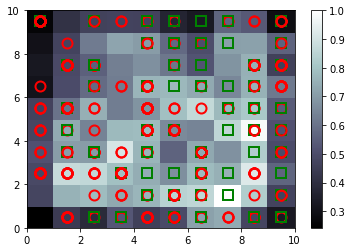

In [8]:
# Visualizar los resultados
from pylab import bone, pcolor, colorbar, plot, show

bone() # Ventana que contendrá el mapa
pcolor(som.distance_map().T) # Distacia media entre neurona, los que están en color blanco son los valores atípicos (posible fraudes)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X): # i: indice, x : valor de las caracteristicas
  w = som.winner(x)
  plot(w[0]+ 0.5, w[1] + 0.5, 
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()



In [12]:

# Encontrar los fraudes
mappings = som.win_map(X)
frauds = np.concatenate( (mappings[(8,4)], mappings[(7, 1)]), axis = 0)

In [13]:
frauds = scaler.inverse_transform(frauds)


array([[1.5646594e+07, 0.0000000e+00, 1.5920000e+01, 2.8750000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 8.5000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.2000000e+02, 1.0000000e+00],
       [1.5577771e+07, 0.0000000e+00, 2.9500000e+01, 1.0850000e+00,
        1.0000000e+00, 1.4000000e+01, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.4000000e+01],
       [1.5593834e+07, 0.0000000e+00, 1.6330000e+01, 2.1000000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.2500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 2.0000000e+00],
       [1.5673907e+07, 0.0000000e+00, 7.1580000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00,

In [14]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15646594.0,0.0,15.92,2.875,2.0,11.0,4.0,0.085,0.0,0.0,0.0,0.0,2.0,120.0,1.0
1,15577771.0,0.0,29.50,1.085,1.0,14.0,4.0,1.000,0.0,0.0,0.0,0.0,2.0,280.0,14.0
2,15593834.0,0.0,16.33,0.210,2.0,6.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,200.0,2.0
3,15673907.0,0.0,71.58,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0,1.0
4,15599272.0,0.0,33.67,0.375,2.0,13.0,4.0,0.375,0.0,0.0,0.0,0.0,2.0,300.0,45.0
5,15611682.0,0.0,20.08,1.250,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,2.0,0.0,1.0
6,15598266.0,1.0,31.67,16.165,2.0,2.0,4.0,3.000,1.0,1.0,9.0,0.0,2.0,250.0,731.0
7,15593694.0,1.0,55.92,11.500,2.0,1.0,1.0,5.000,1.0,1.0,5.0,0.0,2.0,0.0,8852.0


# Trasladar el modelo de no supervisado a supervisado

In [15]:
# Crear la matriz de caracteristicas
customers = dataset.iloc[:, 1:-1].values


In [16]:
is_fraud = np.zeros(len(dataset))

In [17]:
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1
    

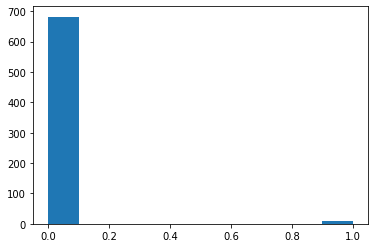

In [28]:
plt.hist(is_fraud)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
customers = sc_X.fit_transform(customers)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [36]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') >= 0.99):
      print('\nSe alcanzó 95% de accuracy')
      self.model.stop_training = True

callbacks = myCallback()

In [37]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 14))
classifier.add( Dense( units = 1, kernel_initializer= 'uniform', activation= 'sigmoid'))

classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(customers, is_fraud, batch_size= 1, epochs = 100, callbacks = callbacks)

Epoch 1/100
690/690 [==============================] - 1s 1ms/step - loss: 0.3507 - accuracy: 0.9870
Epoch 2/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0765 - accuracy: 0.9884
Epoch 3/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0570 - accuracy: 0.9884
Epoch 4/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0513 - accuracy: 0.9884
Epoch 5/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0475 - accuracy: 0.9884
Epoch 6/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0447 - accuracy: 0.9884
Epoch 7/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0425 - accuracy: 0.9884
Epoch 8/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0408 - accuracy: 0.9884
Epoch 9/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0380 - accuracy: 0.9884
Epoch 10/100
690/690 [==============================] - 1s 1ms/step - loss: 0.0372 - accura

In [40]:
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)

In [41]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [42]:
y_pred

array([[1.57238270e+07, 2.63545323e-15],
       [1.57319890e+07, 1.61167873e-14],
       [1.55723900e+07, 4.81906012e-14],
       ...,
       [1.55777710e+07, 5.07435501e-01],
       [1.55992720e+07, 5.07435501e-01],
       [1.56465940e+07, 5.07435501e-01]])

Se obtiene la probabilidad de que cometan fraude